In [1]:
pip install tensorflow matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 338s 2us/step


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu',input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


C:\Users\abuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.2694 - loss: 1.9362 - val_accuracy: 0.5053 - val_loss: 1.3766
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.5062 - loss: 1.3793 - val_accuracy: 0.6002 - val_loss: 1.1325
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 67ms/step - accuracy: 0.5818 - loss: 1.1883 - val_accuracy: 0.6217 - val_loss: 1.0913
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 69ms/step - accuracy: 0.6285 - loss: 1.0629 - val_accuracy: 0.6342 - val_loss: 1.0392
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 78ms/step - accuracy: 0.6621 - loss: 0.9676 - val_accuracy: 0.6582 - val_loss: 0.9955
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 64ms/step - accuracy: 0.6856 - loss: 0.8988 - val_accuracy: 0.6927 - val_loss: 0.8846
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.7062 - loss: 0.8386 - val_accuracy: 0.7032 - val_loss: 0.8487
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.7257 - loss: 0.7915 - 

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7186 - loss: 0.8092
Test accuracy: 0.7152000069618225


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


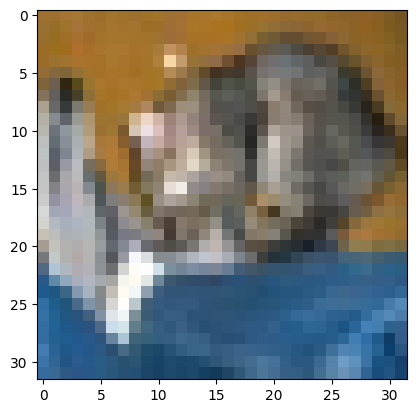

Predicted LabeleL 3
True Label: 3


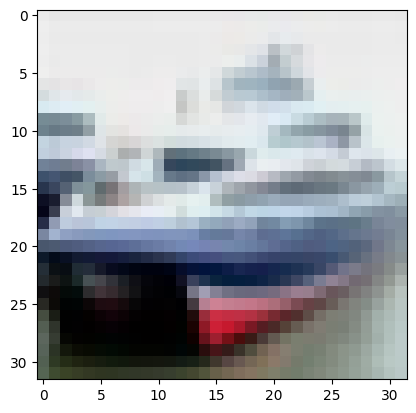

Predicted LabeleL 8
True Label: 8


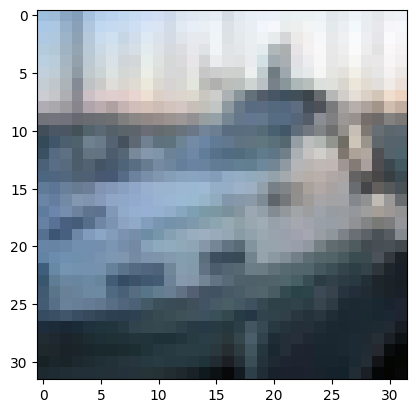

Predicted LabeleL 8
True Label: 8


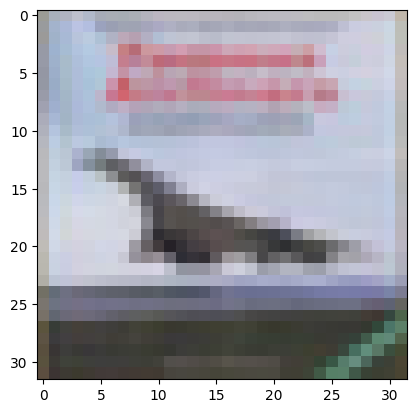

Predicted LabeleL 0
True Label: 0


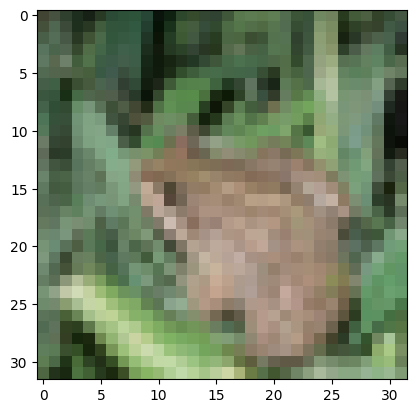

Predicted LabeleL 6
True Label: 6


In [8]:
predictions = model.predict(X_test)

import numpy as np
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_test[i])
    plt.show()
    print(f'Predicted LabeleL {np.argmax(predictions[i])}')
    print(f'True Label: {np.argmax(y_test[i])}')